In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MaxAbsScaler
from scipy.stats import multivariate_normal as mvn
from scipy import stats

%matplotlib inline

In [2]:
def conf_matrix(y_test, y_hat):
    import pandas as pd
    import seaborn as sb
    import matplotlib.pyplot as plt
    
    lt1 = []
    for i in y_test:
        lt1.append(i)
        
    lt2 = []
    for i in y_hat:
        lt2.append(i)
    
    
    positive = 0
    negative = 0
    false_positive = 0
    false_negative = 0
    for x, y in zip(lt1, lt2):        
        
        if x == 0 and y == 1:
            false_positive += 1

        elif x == 1 and y == 0:
            false_negative += 1
            
        elif x == 1 and y == 1:
            positive += 1
        
        elif x == 0 and y == 0:
            negative += 1
    
    # false positives cost $10
    # false negatives cost $500
    total = (false_positive * 10) + (false_negative * 500)
    print('Positives: ', positive)   
    print('Negative: ', negative)
    print('False Positives: ', false_positive)
    print('False Negatives: ', false_negative)
    print('---------------------------------')
    print('Total Cost: $', f'{total:,}')
    print('---------------------------------')
    
    data_conf = {'y_Actual': lt1, 'y_Predicted': lt2}
    df = pd.DataFrame(data_conf, columns=['y_Actual','y_Predicted'])
    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)

    sb.heatmap(confusion_matrix, annot=True, fmt='g')
    
    plt.show()

In [3]:
def accuracy(y,y_hat):
    return np.mean(y == y_hat)

In [4]:
class GaussNB():
    def fit(self, x, y, epsilon = 1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K=set(y.astype(int))
        
        for k in self.K:
            X_k = x[y==k,:]
            self.likelihoods[k] = {'mean': X_k.mean(axis = 0), 'cov': X_k.var(axis=0) + epsilon }
            self.priors[k] = len(X_k) / len(x)
            
    def predict(self, x):
        N,D = x.shape
        P_hat = np.zeros((N,len(self.K)))
        
        for k,l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(x,l['mean'],l['cov'])+np.log(self.priors[k])
        
        return P_hat.argmax(axis=1)



In [5]:
def Imputation_mean(df):
    
    for column in df:
    
        df[column].fillna((df[column].mean()), inplace=True)
    df.astype(float) 
    #
    return df

In [6]:
def random_oversample_mean(df):
    import random
    random.seed(10)
    
    #put here the amount of rows to be generated
    #regards to the start index
    #this dataset ends on 60000 so the index of the next rows will start with 65000
    #66000-65000 = 1000 rows to be generated
    for i in range(65000, 66000):
        small_list = []
        for column in df:
            
            mean = df[column].mean()
            std = df[column].std()
            upperbound = mean + std 
            lowerbound = mean - std

            if lowerbound < 0:
                a = mean * random.uniform(0.7, 1.3)

            else:
 
                a = random.randint(int(lowerbound), int(upperbound))
            
            small_list.append(a)

        df.loc[i]= small_list

### Load dataset

In [7]:
train = pd.read_csv('raw_scania_train_data.csv', na_values="na")
test = pd.read_csv('raw_scania_test_data.csv', na_values="na")

### Overview of the dataset before changes

In [8]:
for column in train:
    if train[column].name == 'class':
        continue
    mean = train[column].mean()
    std = train[column].std()
    up = mean + std
    low = mean - std
    print(train[column].name)
    print('Mean: ', mean)
    print('STD: ', std)
    print('Upper: ', up)
    print('Lower: ', low)
    print('# zeros:  ',(train[column]== 0).astype(int).sum(axis=0))
    print('# Nulls:  ',(train[column].isnull()).astype(int).sum(axis=0))
    print('# Unique: ', train[column].nunique())
    print('------------------------')

index
Mean:  29999.5
STD:  17320.65241265467
Upper:  47320.15241265467
Lower:  12678.847587345332
# zeros:   1
# Nulls:   0
# Unique:  60000
------------------------
aa_000
Mean:  59336.499566666665
STD:  145430.0565316011
Upper:  204766.55609826776
Lower:  -86093.55696493443
# zeros:   393
# Nulls:   0
# Unique:  22095
------------------------
ab_000
Mean:  0.7131885012069343
STD:  3.4789618741114063
Upper:  4.192150375318341
Lower:  -2.765773372904472
# zeros:   10977
# Nulls:   46329
# Unique:  29
------------------------
ac_000
Mean:  356014263.03146565
STD:  794874918.4804139
Upper:  1150889181.5118794
Lower:  -438860655.44894826
# zeros:   8752
# Nulls:   3335
# Unique:  2061
------------------------
ad_000
Mean:  190620.6393141186
STD:  40404411.41832397
Upper:  40595032.05763809
Lower:  -40213790.77900986
# zeros:   2009
# Nulls:   14861
# Unique:  1886
------------------------
ae_000
Mean:  6.8191304347826085
STD:  161.54337337701313
Upper:  168.36250381179573
Lower:  -154.724

# Unique:  45480
------------------------
bu_000
Mean:  4515324.704715979
STD:  10859903.840501955
Upper:  15375228.545217935
Lower:  -6344579.1357859755
# zeros:   107
# Nulls:   691
# Unique:  49349
------------------------
bv_000
Mean:  4515325.287831526
STD:  10859904.502417792
Upper:  15375229.790249318
Lower:  -6344579.214586265
# zeros:   107
# Nulls:   691
# Unique:  49346
------------------------
bx_000
Mean:  4112218.096893009
STD:  10351538.495895308
Upper:  14463756.592788316
Lower:  -6239320.399002299
# zeros:   0
# Nulls:   3257
# Unique:  52848
------------------------
by_000
Mean:  22028.93335797201
STD:  53992.8247379703
Upper:  76021.75809594232
Lower:  -31963.89137999829
# zeros:   1224
# Nulls:   473
# Unique:  22627
------------------------
bz_000
Mean:  101960.83778829199
STD:  628912.8951169373
Upper:  730873.7329052293
Lower:  -526952.0573286454
# zeros:   13841
# Nulls:   2723
# Unique:  16547
------------------------
ca_000
Mean:  39168.81712313996
STD:  36748

ee_002
Mean:  445489.72826105275
STD:  1155539.8214181068
Upper:  1601029.5496791597
Lower:  -710050.093157054
# zeros:   1364
# Nulls:   671
# Unique:  34488
------------------------
ee_003
Mean:  211126.44730233107
STD:  543318.816708597
Upper:  754445.2640109281
Lower:  -332192.3694062659
# zeros:   1557
# Nulls:   671
# Unique:  31711
------------------------
ee_004
Mean:  445734.30649429455
STD:  1168313.930872665
Upper:  1614048.2373669595
Lower:  -722579.6243783705
# zeros:   1797
# Nulls:   671
# Unique:  35188
------------------------
ee_005
Mean:  393946.1979807514
STD:  1121044.406687067
Upper:  1514990.6046678182
Lower:  -727098.2087063155
# zeros:   2814
# Nulls:   671
# Unique:  36288
------------------------
ee_006
Mean:  333058.240388343
STD:  1069159.6968133831
Upper:  1402217.9372017263
Lower:  -736101.4564250401
# zeros:   4458
# Nulls:   671
# Unique:  31795
------------------------
ee_007
Mean:  346271.4298235264
STD:  1728056.0069171777
Upper:  2074327.436740704
L

### Remove Columns with over 50% Zeros

In [9]:
print('# columns Before: ', len(train.columns))
for column in train:
    if ((train[column]== 0).astype(int).sum(axis=0)) > 15000:
        train.drop([column], axis=1, inplace=True)        
print('# columns After: ', len(train.columns))

print('------------------------------------')

print('# columns Before: ', len(test.columns))     
for column in test:
    if ((test[column]== 0).astype(int).sum(axis=0)) > 4000:
        test.drop([column], axis=1, inplace=True)
print('# columns After: ', len(test.columns))  

# columns Before:  172
# columns After:  106
------------------------------------
# columns Before:  172
# columns After:  107


### Remove Columns with over 50% Nulls

In [10]:
print('# columns Before: ', len(train.columns))
for column in train:
    if (train[column].isnull().sum()) > 30000:
        train.drop([column], axis=1, inplace=True)        
print('# columns After: ', len(train.columns))

print('------------------------------------')

print('# columns Before: ', len(test.columns))     
for column in test:
    if (test[column].isnull().sum()) > 8000:
        test.drop([column], axis=1, inplace=True)
print('# columns After: ', len(test.columns))  

# columns Before:  106
# columns After:  98
------------------------------------
# columns Before:  107
# columns After:  99


### Remove Columns with few unique numbers

In [11]:
print('# columns Before: ', len(train.columns))
for column in train:
    if train[column].name == 'class':
        continue
    elif (train[column].nunique()) < 18000:
        train.drop([column], axis=1, inplace=True)      
print('# columns After: ', len(train.columns))

print('------------------------------------')

print('# columns Before: ', len(test.columns))     
for column in test:
    if test[column].name == 'class':
        continue
    elif (test[column].nunique()) < 3200:
        test.drop([column], axis=1, inplace=True)
print('# columns After: ', len(test.columns))  


# columns Before:  98
# columns After:  68
------------------------------------
# columns Before:  99
# columns After:  83


### Compare the both datasets column lengths and make them equal.

In [12]:
name_list = []
for i in test:
    name_list.append(test[i].name)


for column in train:
    
    if train[column].name not in name_list:
        train.drop(train[column].name, axis=1, inplace=True)
print('# columns Train: ', len(train.columns))
print('------------------------------------')
print('# columns Test: ', len(test.columns)) 

# columns Train:  68
------------------------------------
# columns Test:  83


In [13]:
name_list = []
for i in train:
    name_list.append(train[i].name)


for column in test:
    
    if test[column].name not in name_list:
        test.drop(test[column].name, axis=1, inplace=True)
print('# columns Train: ', len(train.columns))
print('------------------------------------')
print('# columns Test: ', len(test.columns)) 

# columns Train:  68
------------------------------------
# columns Test:  68


### Overview of the dataset after changes

In [14]:
for column in train:
    if train[column].name == 'class':
        continue
    mean = train[column].mean()
    std = train[column].std()
    up = mean + std
    low = mean - std
    print(train[column].name)
    print('Mean: ', mean)
    print('STD: ', std)
    print('Upper: ', up)
    print('Lower: ', low)
    print('# zeros:  ',(train[column]== 0).astype(int).sum(axis=0))
    print('# Nulls:  ',(train[column].isnull()).astype(int).sum(axis=0))
    print('# Unique: ', train[column].nunique())
    print('------------------------')

index
Mean:  29999.5
STD:  17320.65241265467
Upper:  47320.15241265467
Lower:  12678.847587345332
# zeros:   1
# Nulls:   0
# Unique:  60000
------------------------
aa_000
Mean:  59336.499566666665
STD:  145430.0565316011
Upper:  204766.55609826776
Lower:  -86093.55696493443
# zeros:   393
# Nulls:   0
# Unique:  22095
------------------------
ag_004
Mean:  437096.63237202715
STD:  2374281.890057823
Upper:  2811378.5224298504
Lower:  -1937185.257685796
# zeros:   1305
# Nulls:   671
# Unique:  23071
------------------------
ag_005
Mean:  1108373.8302685027
STD:  3262607.273818399
Upper:  4370981.104086902
Lower:  -2154233.443549896
# zeros:   1941
# Nulls:   671
# Unique:  40797
------------------------
ag_006
Mean:  1657817.886227646
STD:  3909383.8377803788
Upper:  5567201.724008025
Lower:  -2251565.951552733
# zeros:   1238
# Nulls:   671
# Unique:  40615
------------------------
ah_000
Mean:  1809931.1761098476
STD:  4185740.133908086
Upper:  5995671.310017934
Lower:  -2375808.957

# Unique:  28495
------------------------
dv_000
Mean:  593834.9752767399
STD:  2082997.6495500572
Upper:  2676832.6248267973
Lower:  -1489162.6742733172
# zeros:   3278
# Nulls:   2726
# Unique:  30139
------------------------
ec_00
Mean:  1353.1314515383535
STD:  3536.6372850426237
Upper:  4889.768736580977
Lower:  -2183.5058335042704
# zeros:   1276
# Nulls:   10239
# Unique:  31141
------------------------
ee_000
Mean:  733404.2128132953
STD:  2416165.655569967
Upper:  3149569.8683832623
Lower:  -1682761.4427566715
# zeros:   1089
# Nulls:   671
# Unique:  41815
------------------------
ee_001
Mean:  783874.5906049318
STD:  2570110.8760263687
Upper:  3353985.4666313007
Lower:  -1786236.285421437
# zeros:   1157
# Nulls:   671
# Unique:  38245
------------------------
ee_002
Mean:  445489.72826105275
STD:  1155539.8214181068
Upper:  1601029.5496791597
Lower:  -710050.093157054
# zeros:   1364
# Nulls:   671
# Unique:  34488
------------------------
ee_003
Mean:  211126.44730233107
S

### Transform Categorical values in numerical

In [15]:
train['class'] = pd.Categorical(train['class']).codes
test['class'] = pd.Categorical(test['class']).codes

### Replace strings with NaN

In [16]:
test.replace(to_replace='na', value = np.NaN,inplace = True)
test.replace(to_replace='nan', value = np.NaN,inplace = True)
train.replace(to_replace='na', value = np.NaN,inplace = True)
train.replace(to_replace='nan', value = np.NaN,inplace = True)

### Imputate both datasets with the mean where there are NaN values

In [17]:
test = Imputation_mean(test)
train = Imputation_mean(train)

In [18]:
test.drop(['index'], axis=1, inplace=True)
train.drop(['index'], axis=1, inplace=True)

### Split the data to oversample minority

In [19]:
neg = train[train['class']==0]
pos = train[train['class']==1]

In [20]:
pos.to_csv('pos.csv')

In [21]:
pos = pd.read_csv('pos.csv')

### Use oversampling function on minority class

In [22]:
random_oversample_mean(pos)

In [23]:
pos.drop(['Unnamed: 0'], axis=1, inplace=True)

### Shuffle and slice the majority

In [24]:
neg = neg.sample(frac = 1, random_state=13) 

In [25]:
neg = neg[:10000]

### Create the new train with the undersampled majority and oversampled minority

In [26]:
train = pos.append(neg)

### Drop outliers based on the interquarlites of the columns

In [27]:
len(train.index)

12000

In [28]:
z_scores = stats.zscore(train)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = train[filtered_entries]

new_df

,class,aa_000,ag_004,ag_005,ag_006,ah_000,an_000,ao_000,ap_000,aq_000,...,dv_000,ec_00,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007
0,1.0,153204.0,684444.0,326536.0,31586.0,2.658638e+06,5.566182e+06,4.426834e+06,1.571480e+06,1.120644e+06,...,0.000000,1.900000,512878.0,293880.0,129862.0,26872.0,34044.0,22472.0,34362.0,0.0
2,1.0,72504.0,3813464.0,4876588.0,1202196.0,1.809931e+06,3.461037e+06,3.002440e+06,1.004160e+06,4.424045e+05,...,10772.000000,2365.360000,5935440.0,2161030.0,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0
6,1.0,361638.0,193768.0,1213998.0,611458.0,1.439007e+07,2.467661e+07,2.111007e+07,7.930028e+06,3.690164e+06,...,450506.000000,655.500000,751594.0,396816.0,266410.0,114746.0,180006.0,108294.0,111218.0,264410.0
11,1.0,281324.0,3416030.0,1725790.0,297726.0,1.009305e+07,1.488421e+07,1.336218e+07,9.595596e+06,4.032312e+06,...,35036.000000,886.020000,3787316.0,926638.0,624606.0,269976.0,638838.0,1358354.0,819918.0,262804.0
14,1.0,199350.0,1590532.0,1711948.0,649544.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,19712.000000,1610.640000,993706.0,544308.0,282224.0,95380.0,237386.0,479518.0,899682.0,615538.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28606,0.0,41614.0,2502.0,231792.0,1453288.0,1.255160e+06,2.505362e+06,2.316774e+06,2.958860e+05,1.508020e+05,...,562554.000000,809.240000,365332.0,522664.0,278264.0,111980.0,218028.0,311692.0,408426.0,250270.0
33580,0.0,794.0,37850.0,51530.0,23270.0,5.627400e+04,1.702760e+05,1.569500e+05,5.699400e+04,6.714000e+03,...,7548.000000,338.820000,93740.0,14224.0,3516.0,1582.0,3436.0,17072.0,4200.0,3920.0
9101,0.0,38742.0,6668.0,595824.0,2123758.0,1.519040e+06,2.507418e+06,1.816672e+06,9.889820e+05,5.258800e+05,...,30590.000000,2619.780000,679754.0,908296.0,393380.0,161058.0,300202.0,258110.0,238520.0,166772.0
38163,0.0,60214.0,136230.0,1034662.0,2441536.0,1.369234e+06,3.377524e+06,2.986140e+06,8.409660e+05,3.177040e+05,...,593834.975277,1353.131452,437454.0,674238.0,575176.0,313134.0,629888.0,597194.0,439778.0,156628.0


In [29]:
train = new_df

In [30]:
len(train.index)

9984

### Reshuffle new Train set

In [31]:
train = train.sample(frac = 1, random_state=13) 

### Split the data

In [32]:
y_train = train['class']
X_train = train
X_train.drop(['class'], inplace=True, axis=1)

y_test = test['class']
X_test= test
X_test.drop(['class'], inplace=True, axis=1)

### Normalize it

In [33]:
scaler = MaxAbsScaler()
scaler.fit(X_train, X_test)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Train the model

In [34]:
gnb = GaussNB()
gnb.fit(X_train, y_train)
y_hat = gnb.predict(X_test)
print(f"Gauss Accuracy : {accuracy(y_test,y_hat):0.3f}")

Gauss Accuracy : 0.928


---------------------------------
Approach:
Imputation Mean
Null Removed > 50%
Zeros Removed > 50%
Unique Values < 20%
Over, Undersampling 20-80
---------------------------------
Positives:  367
Negative:  14485
False Positives:  1140
False Negatives:  8
---------------------------------
Total Cost: $ 15,400
---------------------------------


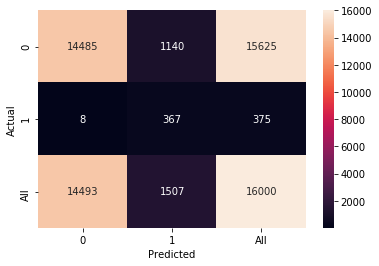

In [35]:
print('---------------------------------')
print('Approach:')
print('Imputation Mean')
print('Null Removed > 50%')
print('Zeros Removed > 50%')
print('Unique Values < 20%')
print('Over, Undersampling 20-80')
print('---------------------------------')
conf_matrix(y_test, y_hat)